In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv(r"product_management_data\workout.csv")
print(df.head(5))

     month  workout_worldwide
0  2018-03                 59
1  2018-04                 61
2  2018-05                 57
3  2018-06                 56
4  2018-07                 51


In [32]:
print(f"Shape of dataframe : {df.shape}")
print(f"Info about dataframe : {df.info()}")
print(f"Describe : {df.describe()}")

Shape of dataframe : (61, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month              61 non-null     object
 1   workout_worldwide  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
Info about dataframe : None
Describe :        workout_worldwide
count          61.000000
mean           56.721311
std             9.027977
min            44.000000
25%            50.000000
50%            56.000000
75%            61.000000
max           100.000000


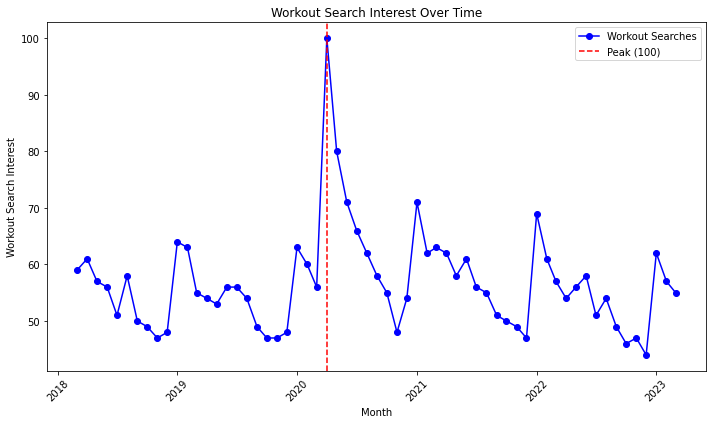

In [33]:
df['month'] = pd.to_datetime(df['month'])
plt.figure(figsize=(10,6))
plt.plot(df['month'], df['workout_worldwide'],color='blue', marker='o', label ='Workout Searches')

max_searches = max(df['workout_worldwide'])
max_searches_month = df[df['workout_worldwide']==max_searches]['month'].values[0]
plt.axvline(max_searches_month, color = 'r', linestyle ='--', label = f'Peak ({max_searches})')

plt.xlabel('Month')
plt.ylabel('Workout Search Interest')
plt.title("Workout Search Interest Over Time")

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [92]:
date_var = pd.to_datetime(max_searches_month)
date_var = date_var.strftime('%Y-%m-%d')
year_str = date_var.split("-")[0]
print(year_str)

2020


In [34]:
df2 = pd.read_csv(r"product_management_data\three_keywords.csv")
df2.head()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9


In [35]:
print(f"Shape of dataframe : {df2.shape}")
print(f"Info about dataframe : {df2.info()}")
print(f"Describe : {df2.describe()}")

Shape of dataframe : (61, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   month                   61 non-null     object
 1   home_workout_worldwide  61 non-null     int64 
 2   gym_workout_worldwide   61 non-null     int64 
 3   home_gym_worldwide      61 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB
Info about dataframe : None
Describe :        home_workout_worldwide  gym_workout_worldwide  home_gym_worldwide
count               61.000000              61.000000           61.000000
mean                16.426230              16.180328           13.655738
std                 10.393041               2.539739            5.179721
min                 10.000000              10.000000            9.000000
25%                 12.000000              14.000000           10.000000
50%                 13.000000 

Text(0.5, 1.0, 'Most prevalent keyword during Covid and current year')

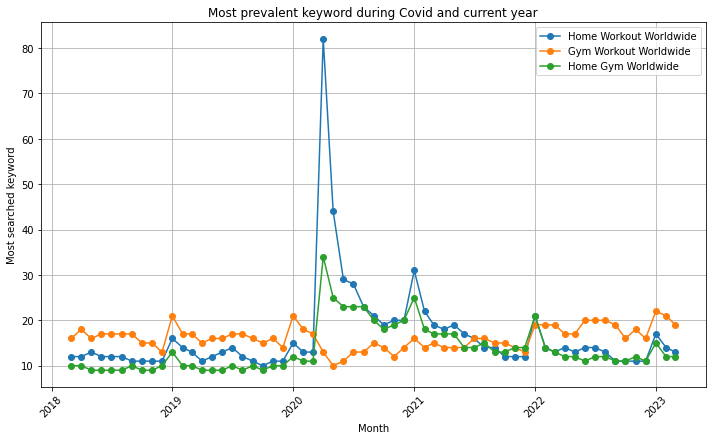

In [36]:
df2['month'] = pd.to_datetime(df2['month'])
plt.figure(figsize=(10,6))
plt.plot(df2['month'], df2['home_workout_worldwide'], marker="o", label= "Home Workout Worldwide")
plt.plot(df2['month'], df2['gym_workout_worldwide'], marker="o", label= "Gym Workout Worldwide")
plt.plot(df2['month'], df2['home_gym_worldwide'], marker="o", label= "Home Gym Worldwide")
plt.legend()
plt.grid(True)
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Most searched keyword')
plt.tight_layout()
plt.title("Most prevalent keyword during Covid and current year")

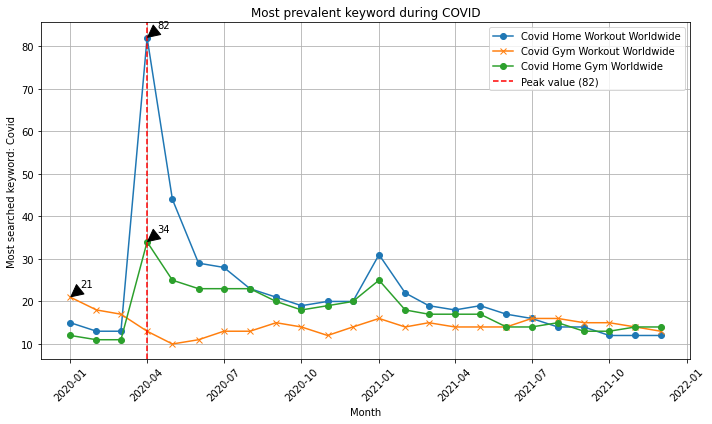

In [37]:
#Plots for COVID period

covid_df = df2[(df2['month']>='2020-01-01') & (df2['month']<= '2021-12-31')]

peak_dict = {}
for column in ['home_workout_worldwide','gym_workout_worldwide','home_gym_worldwide']:
    max_idx = covid_df[column].idxmax()
    peak_dict[column] = {
        "value" : covid_df.loc[max_idx,column],
        "month" : covid_df.loc[max_idx, 'month']
    }

max_row = max(peak_dict.items())
max_row_value = max_row[1]['value']
max_row_month = max_row[1]['month']

plt.figure(figsize=(10,6))
plt.plot(covid_df['month'], covid_df['home_workout_worldwide'], marker="o", label= "Covid Home Workout Worldwide")
plt.plot(covid_df['month'], covid_df['gym_workout_worldwide'], marker="x", label= "Covid Gym Workout Worldwide")
plt.plot(covid_df['month'], covid_df['home_gym_worldwide'], marker="o", label= "Covid Home Gym Worldwide")
for column, peak_info in peak_dict.items():
    plt.annotate(f"{peak_info['value']}",
                 xy = (peak_info['month'], peak_info['value']),
                 xytext=(10,10),
                 textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.05))
plt.axvline(max_row_month, color = 'r', linestyle=  '--', label = f"Peak value ({max_row_value})")

plt.legend()
plt.grid(True)
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Most searched keyword: Covid')
plt.title("Most prevalent keyword during COVID")
plt.tight_layout()
plt.show()

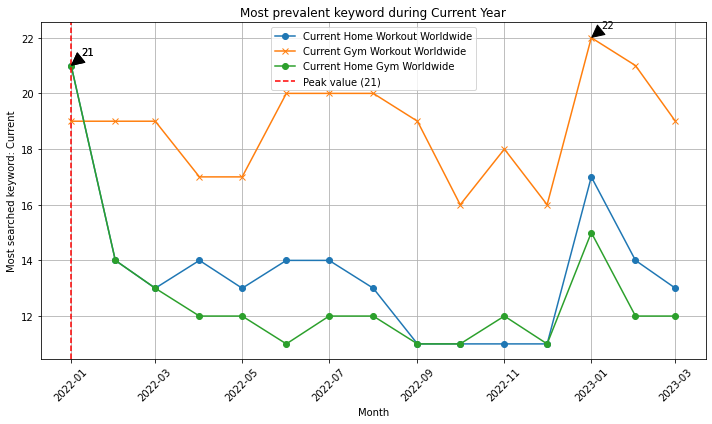

In [38]:
#Plots for non-COVID period

current_df = df2[(df2['month']>='2022-01-01') & (df2['month']<="2023-03-01")]

peak_dict_current = {}

for column in ['home_workout_worldwide','gym_workout_worldwide','home_gym_worldwide']:
    max_idx2 = current_df[column].idxmax()
    peak_dict_current[column] = {
        'value' : current_df.loc[max_idx2,column],
        'month' : current_df.loc[max_idx2, 'month']
    }

max_row = max(peak_dict_current.items())
max_row_value = max_row[1]['value']
max_row_month = max_row[1]['month']

plt.figure(figsize=(10,6))
plt.plot(current_df['month'], current_df['home_workout_worldwide'], marker="o", label= "Current Home Workout Worldwide")
plt.plot(current_df['month'], current_df['gym_workout_worldwide'], marker="x", label= "Current Gym Workout Worldwide")
plt.plot(current_df['month'], current_df['home_gym_worldwide'], marker="o", label= "Current Home Gym Worldwide")
for column, peak_info in peak_dict_current.items():
    plt.annotate(f"{peak_info['value']}",
                 xy = (peak_info['month'], peak_info['value']),
                 xytext=(10,10),
                 textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.05))
plt.axvline(max_row_month, color = 'r', linestyle=  '--', label = f"Peak value ({max_row_value})")

plt.legend()
plt.grid(True)
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Most searched keyword: Current')
plt.title("Most prevalent keyword during Current Year")
plt.tight_layout()
plt.show()

In [94]:
#Analysis and Findings

covid_max = {
    'home_workout' : covid_df['home_workout_worldwide'].max(),
    'gym_workout' : covid_df['gym_workout_worldwide'].max(),
    'home_gym' : covid_df['home_gym_worldwide'].max()
}
current_max = {
    'home_workout' : current_df['home_workout_worldwide'].max(),
    'gym_workout' : current_df['gym_workout_worldwide'].max(),
    'home_gym' : current_df['home_gym_worldwide'].max()
}

peak_covid, peak_covid_val = max(covid_max.items(), key = lambda x:x[1])
current, current_val = max(current_max.items(), key = lambda x:x[1])
print("\nKEY FINDINGS")
print("\nDuring COVID:")
print(f"Most popular keyword during COVID: {peak_covid} with value {peak_covid_val}")

print("\nDuring Current Year:")
print(f"Most popular keyword during Current Year: {current} with value {current_val}")


KEY FINDINGS

During COVID:
Most popular keyword during COVID: home_workout with value 82
<class 'str'>

During Current Year:
Most popular keyword during Current Year: gym_workout with value 22


COUNTRY WITH THE HIGHEST INTEREST IN WORKOUTS

In [40]:
country_df = pd.read_csv(r"product_management_data\workout_geo.csv")
country_df.head(10)

,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN
5,United States,100.0
6,Gibraltar,NaN
7,Northern Mariana Islands,NaN
8,American Samoa,NaN
9,Bermuda,NaN


In [41]:
print(country_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            250 non-null    object 
 1   workout_2018_2023  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB
None


In [42]:
print(country_df.describe())

       workout_2018_2023
count          61.000000
mean           27.967213
std            24.150202
min             1.000000
25%             9.000000
50%            20.000000
75%            36.000000
max           100.000000


In [43]:
#Examining missing/null data
number_of_missing_values = country_df['workout_2018_2023'].isna().sum()
percentage_data_missing = number_of_missing_values*100/len(country_df)
print(f"Total number of data points/countries : {len(country_df)}")
print(f"Number of missing values : {number_of_missing_values}")
print(f"Percentage if missing data in Workout 2018-2023 : {percentage_data_missing}%")


Total number of data points/countries : 250
Number of missing values : 189
Percentage if missing data in Workout 2018-2023 : 75.6%


In [45]:
# Since we are only concerned with the data available, lets drop values with NaN values

country_data = country_df.dropna()
print(country_data)

           country  workout_2018_2023
5    United States              100.0
12          Canada               86.0
18       Australia               77.0
22     New Zealand               73.0
23         Lebanon               73.0
..             ...                ...
208        Ukraine                2.0
209      Argentina                2.0
212         Russia                2.0
215         Brazil                2.0
216          Japan                1.0

[61 rows x 2 columns]


In [84]:
country_interest = country_data.sort_values(by='workout_2018_2023',ascending=False)
top_country = country_interest.iloc[0]['country']
print(f"The country with the highest interest in workouts is: {top_country}")

The country with the highest interest in workouts is: United States


In [77]:
#Countries in MESA region
mesa_country_data = pd.read_csv(r"product_management_data\three_keywords_geo.csv")
mesa_countries = ['Philippines', "Malaysia"]
mesa_df = mesa_country_data[ mesa_country_data['Country'].isin(mesa_countries)]

print(mesa_df)

        Country  home_workout_2018_2023  gym_workout_2018_2023  \
23  Philippines                    52.0                   38.0   
61     Malaysia                    47.0                   38.0   

    home_gym_2018_2023  
23                10.0  
61                15.0  


In [83]:
sorted_df = mesa_df.sort_values(by="home_workout_2018_2023", ascending=False)
home_workout_geo = sorted_df.iloc[0]["Country"]
print(f"Country among Philippines and Malaysia with highest home workout: {home_workout_geo}")

Country among Philippines and Malaysia with highest home workout: Philippines
